# Resubmitted corrected section 5 for grading

# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.capitalize()
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

print(cities)

Number of cities in the list: 612
['Valdivia', 'Ulsteinvik', 'Sumbawa besar', 'Arecibo', 'General conesa', 'Kodiak', 'Severo-yeniseyskiy', 'Kuta', 'Kourou', 'Torrington', 'Qaqortoq', 'Waitangi', 'Tanjung selor', 'Dudinka', 'Iskateley', 'Polyarnyy', 'Saipan', 'Adamstown', 'Grytviken', 'Arraial do cabo', 'Lihue', 'Bilibino', 'Olonkinbyen', 'Taoudenni', 'Roma', 'Arkhara', 'Iqaluit', 'Hamilton', 'Isafjordur', 'Ain beni mathar', 'Tromso', 'Tsiombe', 'Bayside', 'Fortuna', 'Labasa', 'Kuala tungkal', 'Rongelap', 'Georgetown', 'Mata-utu', 'Bredasdorp', 'Port alfred', 'College', 'Iowa park', 'Thompson', 'Luderitz', 'Alaghsas', 'Colonia', 'Xudat', 'Machico', 'Prado', 'Shingu', 'Taltal', 'Vilyuchinsk', 'Port-aux-francais', 'Port mathurin', 'Aasiaat', 'Puerto ayora', 'Tiksi', 'Chonchi', 'Pemba', 'Bethel', 'Richards bay', 'Yermakovskoye', 'Invercargill', 'Ilulissat', 'West island', 'Dobryanka', 'Lamu', "Karakul'", 'Bereznik', 'Borovsk', 'Vernon', 'Neiafu', 'Ushuaia', 'Jawf al maqbabah', 'Pisco', 'Bl

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


In [5]:
# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | Valdivia
Processing Record 2 of Set 1 | Ulsteinvik
Processing Record 3 of Set 1 | Sumbawa besar
Processing Record 4 of Set 1 | Arecibo
Processing Record 5 of Set 1 | General conesa
Processing Record 6 of Set 1 | Kodiak
Processing Record 7 of Set 1 | Severo-yeniseyskiy
Processing Record 8 of Set 1 | Kuta
Processing Record 9 of Set 1 | Kourou
Processing Record 10 of Set 1 | Torrington
Processing Record 11 of Set 1 | Qaqortoq
Processing Record 12 of Set 1 | Waitangi
Processing Record 13 of Set 1 | Tanjung selor
City not found. Skipping...
Processing Record 14 of Set 1 | Dudinka
Processing Record 15 of Set 1 | Iskateley
Processing Record 16 of Set 1 | Polyarnyy
Processing Record 17 of Set 1 | Saipan
Processing Record 18 of Set 1 | Adamstown
Processing Record 19 of Set 1 | Grytviken
Processing Record 20 of Set 1 | Arraial do cabo
Processing Record 21 of Set 1 | Lihue
Processing Record 22 of Set 1 | Bilibino
Processing Record 23 of Set 1 | Olonkinbyen
Processin

Processing Record 40 of Set 4 | Bayganin
Processing Record 41 of Set 4 | Petropavlovsk-kamchatsky
Processing Record 42 of Set 4 | Hithadhoo
Processing Record 43 of Set 4 | Bafia
Processing Record 44 of Set 4 | Fort mcmurray
Processing Record 45 of Set 4 | Kerikeri
Processing Record 46 of Set 4 | Sinabang
Processing Record 47 of Set 4 | Warrnambool
Processing Record 48 of Set 4 | Hermanus
Processing Record 49 of Set 4 | Coahuayana de hidalgo
Processing Record 0 of Set 5 | San antonio de pale
Processing Record 1 of Set 5 | Bodo
Processing Record 2 of Set 5 | Jinchang
Processing Record 3 of Set 5 | Kaya
Processing Record 4 of Set 5 | Nova sintra
Processing Record 5 of Set 5 | Al jawf
Processing Record 6 of Set 5 | Keflavik
Processing Record 7 of Set 5 | Magdagachi
Processing Record 8 of Set 5 | Nikolayevsk-on-amure
Processing Record 9 of Set 5 | Port lincoln
Processing Record 10 of Set 5 | Namibe
Processing Record 11 of Set 5 | La manga del mar menor
Processing Record 12 of Set 5 | Mariin

Processing Record 34 of Set 8 | Egilsstadir
Processing Record 35 of Set 8 | Kabare
Processing Record 36 of Set 8 | Akureyri
Processing Record 37 of Set 8 | Mbandaka
Processing Record 38 of Set 8 | Mirador
Processing Record 39 of Set 8 | Am djarass
City not found. Skipping...
Processing Record 40 of Set 8 | Kurchatov
Processing Record 41 of Set 8 | Strezhevoy
Processing Record 42 of Set 8 | Corinto
Processing Record 43 of Set 8 | Owando
Processing Record 44 of Set 8 | Boiling springs
Processing Record 45 of Set 8 | Belmonte
Processing Record 46 of Set 8 | Tchintabaraden
Processing Record 47 of Set 8 | Sale
Processing Record 48 of Set 8 | Pandan
Processing Record 49 of Set 8 | Cill airne
Processing Record 0 of Set 9 | Tetiiv
Processing Record 1 of Set 9 | Aykhal
Processing Record 2 of Set 9 | Alghero
Processing Record 3 of Set 9 | Sulak
Processing Record 4 of Set 9 | San agustin de valle fertil
Processing Record 5 of Set 9 | Minas de marcona
Processing Record 6 of Set 9 | Broome
Processi

Processing Record 24 of Set 12 | Karkkila
Processing Record 25 of Set 12 | Hikari
Processing Record 26 of Set 12 | Sawang wirawong
Processing Record 27 of Set 12 | Sisimiut
Processing Record 28 of Set 12 | Rong kwang
Processing Record 29 of Set 12 | Oriximina
Processing Record 30 of Set 12 | Phillip island
Processing Record 31 of Set 12 | Yangambi
Processing Record 32 of Set 12 | Sagalo
City not found. Skipping...
Processing Record 33 of Set 12 | Stickney
Processing Record 34 of Set 12 | Mao
Processing Record 35 of Set 12 | Churapcha
Processing Record 36 of Set 12 | Saurimo
Processing Record 37 of Set 12 | Bulgan
Processing Record 38 of Set 12 | Rengasdengklok
Processing Record 39 of Set 12 | Port hedland
Processing Record 40 of Set 12 | Umba
Processing Record 41 of Set 12 | Pamandzi
Processing Record 42 of Set 12 | Igarka
Processing Record 43 of Set 12 | Hasaki
Processing Record 44 of Set 12 | Alotau
City not found. Skipping...
Processing Record 45 of Set 12 | Neryungri
Processing Rec

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Valdivia,-39.8142,-73.2459,281.20,94,0,1.26,CL,1715727469
1,Ulsteinvik,62.3432,5.8487,287.77,68,4,0.89,NO,1715727757
2,Sumbawa besar,-8.5000,117.4333,295.06,82,83,1.85,ID,1715727757
3,Arecibo,18.4724,-66.7157,302.60,78,10,1.79,PR,1715727616
4,General conesa,-40.1000,-64.4333,282.12,47,0,5.95,AR,1715727757


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities_2.csv", index_label="City_ID")

In [5]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities_2.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Rabaul,-4.1967,152.1721,300.68,76,58,1.09,PG,1714253995
1,Edinburgh of the seven seas,-37.0676,-12.3116,285.59,71,98,12.48,SH,1714253899
2,Kaiapoi,-43.3783,172.6401,289.57,77,9,1.03,NZ,1714253995
3,Bethel,41.3712,-73.4140,288.26,37,0,6.17,US,1714253807
4,Jamestown,42.0970,-79.2353,291.88,71,99,5.81,US,1714253904


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

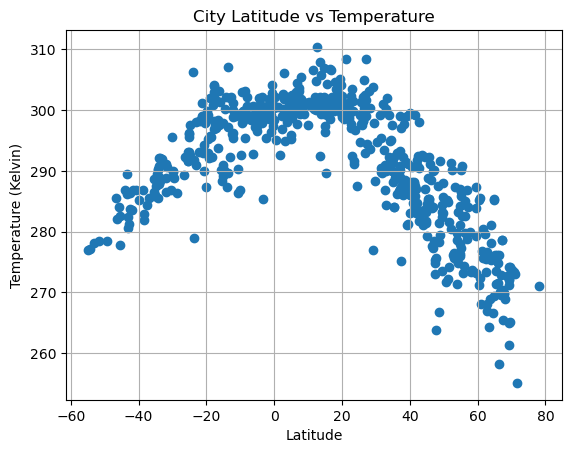

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Temperature")
plt.ylabel("Temperature (Kelvin)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

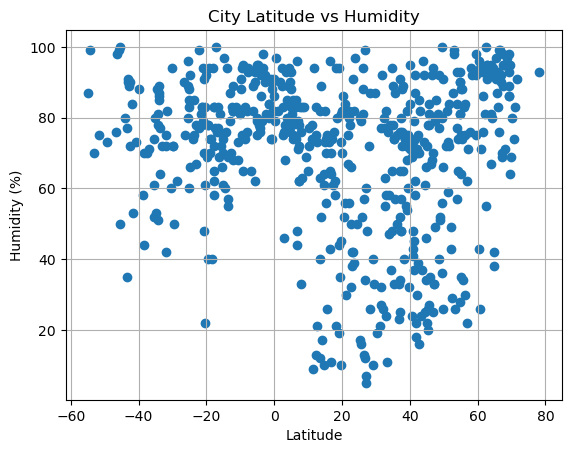

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

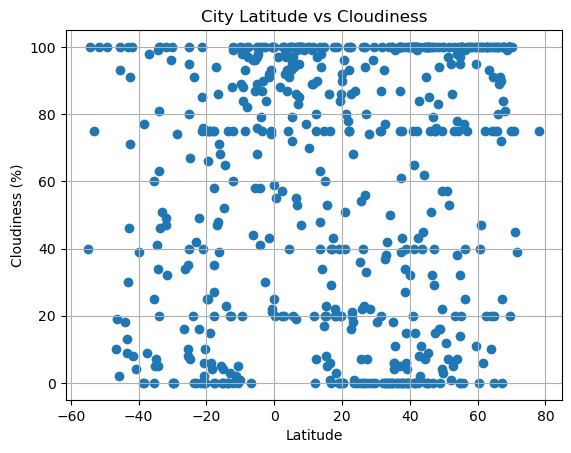

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

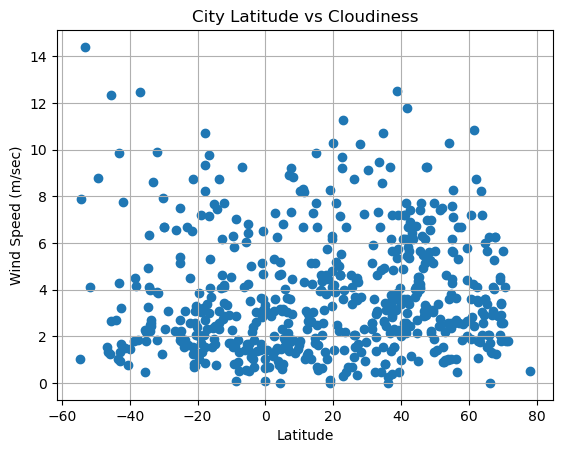

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Wind Speed (m/sec)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
#x_values = city_data_df['Lat']
#y_values = city_data_df[]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
#plt.title("City Latitude vs _____")
#plt.xlabel('Lat')
#plt.ylabel('')
#print(f"The r-squared is: {rvalue**2}")
#plt.show()

In [11]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,Bethel,41.3712,-73.4140,288.26,37,0,6.17,US,1714253807
4,Jamestown,42.0970,-79.2353,291.88,71,99,5.81,US,1714253904
5,Yellowknife,62.4560,-114.3525,273.38,55,20,4.12,CA,1714253694
6,Georgetown,5.4112,100.3354,302.11,85,20,1.54,MY,1714253731
7,Hobyo,5.3505,48.5268,302.45,78,72,6.81,SO,1714253995


In [12]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Rabaul,-4.1967,152.1721,300.68,76,58,1.09,PG,1714253995
1,Edinburgh of the seven seas,-37.0676,-12.3116,285.59,71,98,12.48,SH,1714253899
2,Kaiapoi,-43.3783,172.6401,289.57,77,9,1.03,NZ,1714253995
9,Prado,-17.3411,-39.2208,297.57,77,0,3.40,BR,1714253996
10,Grytviken,-54.2811,-36.5092,277.08,99,100,7.90,GS,1714253901


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7662613627614521


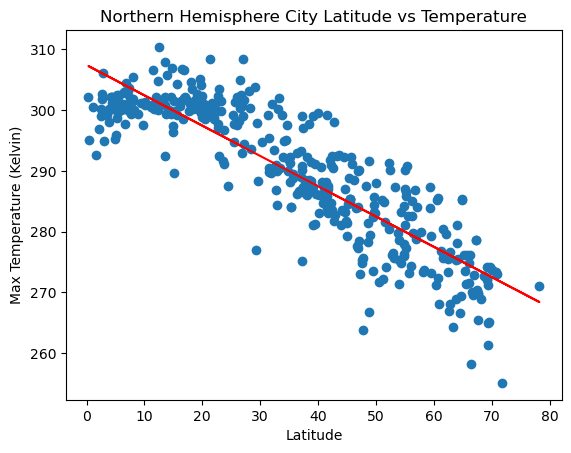

In [28]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitude vs Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Kelvin)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig5.png")
plt.show()

The r-squared is: 0.616816218151173


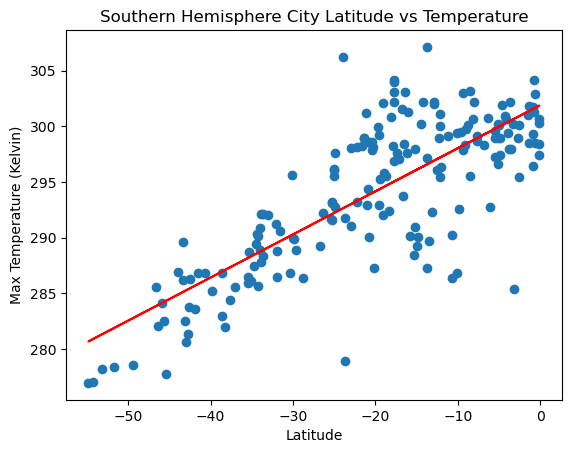

In [29]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitude vs Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Kelvin)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** 
The two charts above, plot latitude vs. temperature for cities located in the northern hemisphere and southern hemisphere, separately. Both plots show a corrolation between temperature and latitude: the highest temperatures occur in cities that are closer to the equator (Latitude = 0), and the lowest temperatures generally occur in cities closer to the poles. the r-squared values are above 0.6, which is the strongest corrolation amoung the four relationships evaluated in this challenge.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.020040406123142035


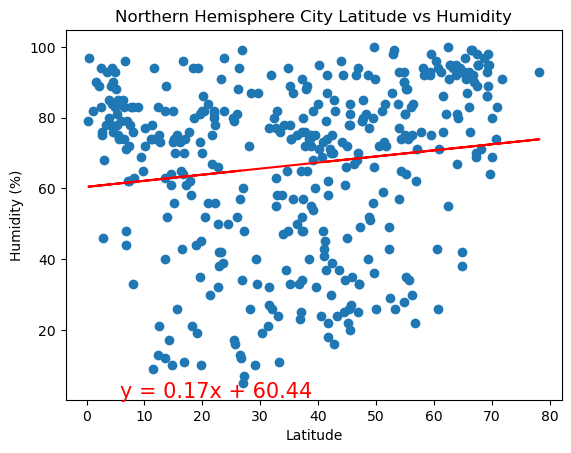

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig7.png")
plt.show()

The r-squared is: 0.041041129474461514


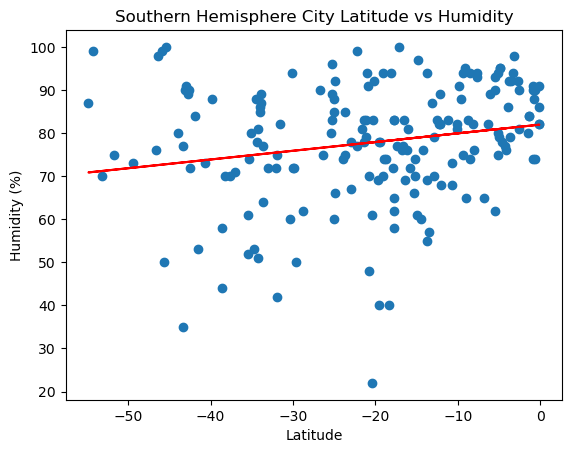

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** 
The two charts above, plot latitude vs. humidity for cities located in the northern hemisphere and southern hemisphere, separately. The line and equation show little correlation between latitude and humidity, leaning toward higher humidities in the higher latitudes of the northern hemisphere and near the equator in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0021872330920812977


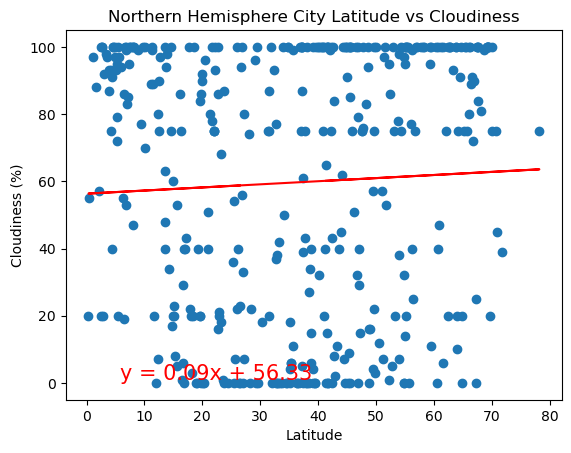

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig9.png")
plt.show()

The r-squared is: 0.037124940044096624


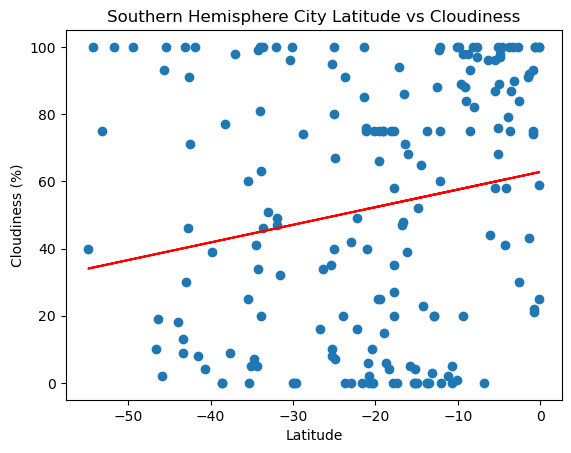

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig10.png")
plt.show()

**Discussion about the linear relationship:** 
The two charts above, plot latitude vs. cloudiness for cities located in the northern hemisphere and southern hemisphere, separately. The line and equation show no correlation between latitude and cloudiness in the northern hemisphere, and little correlation in the southern hemisphere, leaning towards greater percent cloudienss at the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0018685315898928302


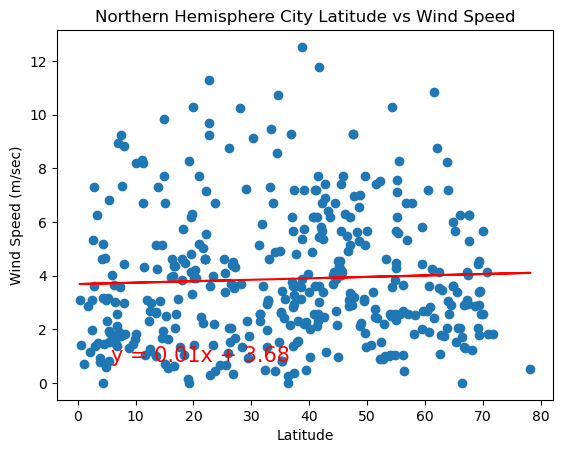

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/sec)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig11.png")
plt.show()

The r-squared is: 0.030526174242467664


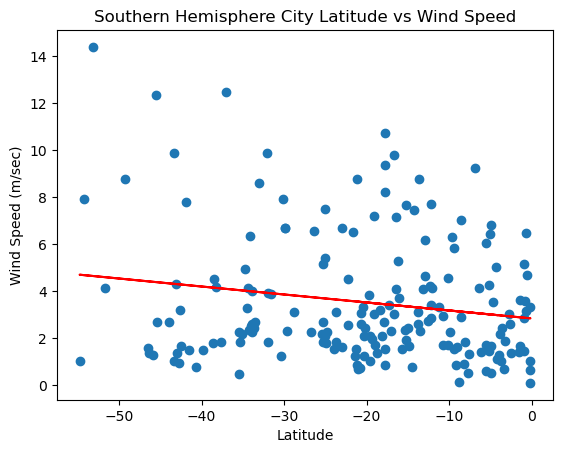

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/sec)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig12.png")
plt.show()

**Discussion about the linear relationship:** 
The two charts above, plot latitude vs. wind speed for cities located in the northern hemisphere and southern hemisphere, separately. The line and equation show no correlation between latitude and wind speed in the northern hemisphere, and little correlation in the southern hemisphere, leaning towards greater wind speeds at the equator.